In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Mea = Base.classes.measurement
Sta = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
session.query(Mea.date).\
    order_by(Mea.date.desc()).\
    limit(1).all()

[('2017-08-23',)]

In [27]:
rainfall = session.query(Mea.prcp, Mea.date).filter(Mea.date > '2016-08-23').all()
rainfall

[(0.08, '2016-08-24'),
 (0.08, '2016-08-25'),
 (0.0, '2016-08-26'),
 (0.0, '2016-08-27'),
 (0.01, '2016-08-28'),
 (0.0, '2016-08-29'),
 (0.0, '2016-08-30'),
 (0.13, '2016-08-31'),
 (0.0, '2016-09-01'),
 (0.0, '2016-09-02'),
 (0.0, '2016-09-03'),
 (0.03, '2016-09-04'),
 (None, '2016-09-05'),
 (None, '2016-09-06'),
 (0.05, '2016-09-07'),
 (0.0, '2016-09-08'),
 (0.03, '2016-09-09'),
 (0.0, '2016-09-10'),
 (0.05, '2016-09-11'),
 (0.0, '2016-09-12'),
 (0.02, '2016-09-13'),
 (1.32, '2016-09-14'),
 (0.42, '2016-09-15'),
 (0.06, '2016-09-16'),
 (0.05, '2016-09-17'),
 (0.0, '2016-09-18'),
 (0.0, '2016-09-19'),
 (0.0, '2016-09-20'),
 (0.0, '2016-09-21'),
 (0.02, '2016-09-22'),
 (0.0, '2016-09-23'),
 (0.0, '2016-09-24'),
 (0.0, '2016-09-25'),
 (0.06, '2016-09-26'),
 (0.02, '2016-09-27'),
 (0.0, '2016-09-28'),
 (0.0, '2016-09-29'),
 (0.0, '2016-09-30'),
 (0.0, '2016-10-01'),
 (0.0, '2016-10-02'),
 (0.0, '2016-10-03'),
 (0.0, '2016-10-04'),
 (0.0, '2016-10-05'),
 (0.0, '2016-10-06'),
 (0.0, '2016-1

In [26]:
df_rainfall = pd.DataFrame(rainfall)
df_rainfall
df_rainfall.sort_values(by='date', ascending=False)

,prcp,date
2222,0.45,2017-08-23
1523,0.08,2017-08-23
1005,0.00,2017-08-23
359,0.00,2017-08-23
1522,0.00,2017-08-22
...,...,...
1188,1.22,2016-08-24
1875,1.45,2016-08-24
360,2.15,2016-08-24
1524,2.15,2016-08-24


<Axes: xlabel='Date', ylabel='Precipitation'>

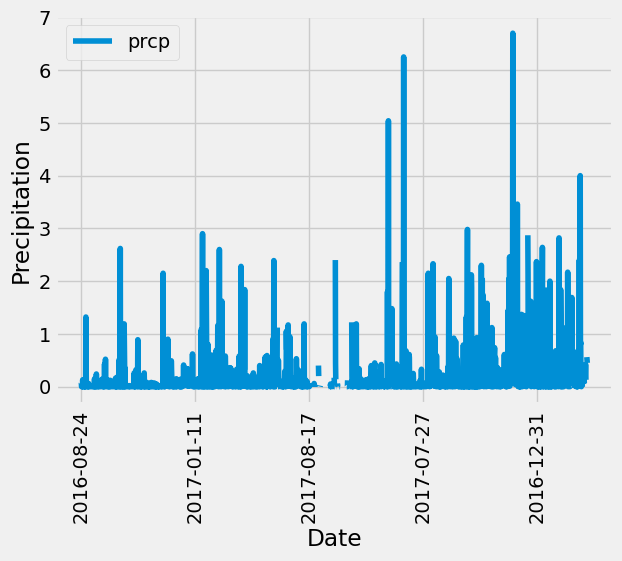

In [70]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame. Explicitly set the column names


# Sort the dataframe by date

# This data is shown in the previous tables :) thank you for your understanding 

# Use Pandas Plotting with Matplotlib to plot the data
df_rainfall.plot(x="date", y="prcp", rot=90, xlabel='Date', ylabel='Precipitation')

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
df_rainfall.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [47]:
# Design a query to calculate the total number of stations in the dataset
session.query(Sta.station).count()

9

In [78]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(Mea.station, func.count(Mea.station)).\
    group_by(Mea.station).\
    order_by(func.count(Mea.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [79]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Mea.tobs), func.max(Mea.tobs), func.avg(Mea.tobs)).\
    filter(Mea.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 4.183333333333314, 'Temperature')

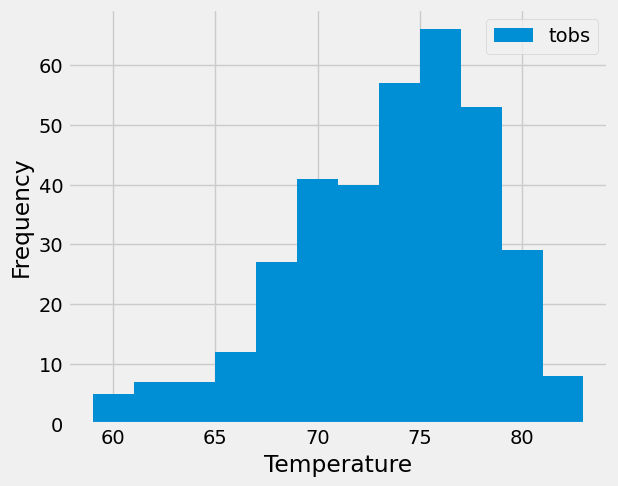

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
all_tobs = session.query(Mea.tobs).filter(Mea.date > '2016-08-23').filter(Mea.station == 'USC00519281').all()
all_tobs = [val for val, in all_tobs]

plt.hist(all_tobs)

# Close Session

In [16]:
# Close Session
session.close()